In [1]:
### Calculate LISI Index to evaluate integration after scanorama

#############################################
# Prerequisites - Load Libraries

In [2]:
source('MS0_Libraries.r')

In [13]:
source('MS4_Plot_Config.r')

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


###############################################
# Preqrequisites Configurations & Parameters

In [14]:
data_path =  '../data/current'

In [15]:
result_path =  '../results/current'

# Data

In [17]:
## Data after scanorama integration

In [18]:
library_annotation_scanorama = read.csv(paste0(data_path, 'B-Analysis/', 'B2_Scanorama_Annotations.csv'))

In [19]:
umap_embedding_scanorama =  read.csv(paste0(data_path, 'B-Analysis/', 'B2_Scanorama_UMAP_Embedding.csv'))

In [20]:
rownames(library_annotation_scanorama) = library_annotation_scanorama$X
library_annotation_scanorama$X = NULL

In [21]:
head(library_annotation_scanorama,2)

,library_id
,<chr>
AAACCCACATACAGGG-1-L1,L1
AAACCCACATGACTTG-1-L1,L1


In [22]:
rownames(umap_embedding_scanorama) = umap_embedding_scanorama$X
umap_embedding_scanorama$X = NULL

In [23]:
head(umap_embedding_scanorama,2)

,X1,X2
,<dbl>,<dbl>
AAACCCACATACAGGG-1-L1,3.746732,-1.571113
AAACCCACATGACTTG-1-L1,17.418547,5.574673


In [24]:
## Data before scanorama integration

In [25]:
library_annotation_concat = read.csv(paste0(data_path, 'B-Analysis/', 'B2_Concat_Annotations.csv'))

In [26]:
umap_embedding_concat =  read.csv(paste0(data_path, 'B-Analysis/', 'B2_Concat_UMAP_Embedding.csv'))

In [27]:
rownames(library_annotation_concat) = library_annotation_concat$X
library_annotation_concat$X = NULL

In [28]:
head(library_annotation_concat,2)

,library_id
,<chr>
AAACCCACATACAGGG-1-L1,L1
AAACCCACATGACTTG-1-L1,L1


In [29]:
rownames(umap_embedding_concat ) = umap_embedding_concat$X
umap_embedding_concat $X = NULL

In [30]:
head(umap_embedding_concat ,2)

,X1,X2
,<dbl>,<dbl>
AAACCCACATACAGGG-1-L1,-3.006969,10.431176
AAACCCACATGACTTG-1-L1,9.068130,7.331071


# LISI calculation

In [86]:
perplexity_param = 30

In [87]:
### For scanorama embedding

In [88]:
unique(library_annotation_scanorama$library_id)

[1] "L1"  "L2"  "L3"  "L4"  "L5"  "L6"  "L7"  "L8"  "L9"  "L10" "L11" "L12"
[13] "L13" "L14"

In [89]:
res = compute_lisi(umap_embedding_scanorama, library_annotation_scanorama, c('library_id'), perplexity = perplexity_param)

In [90]:
head(res,2)

,library_id
,<dbl>
AAACCCACATACAGGG-1-L1,5.515944
AAACCCACATGACTTG-1-L1,6.362144


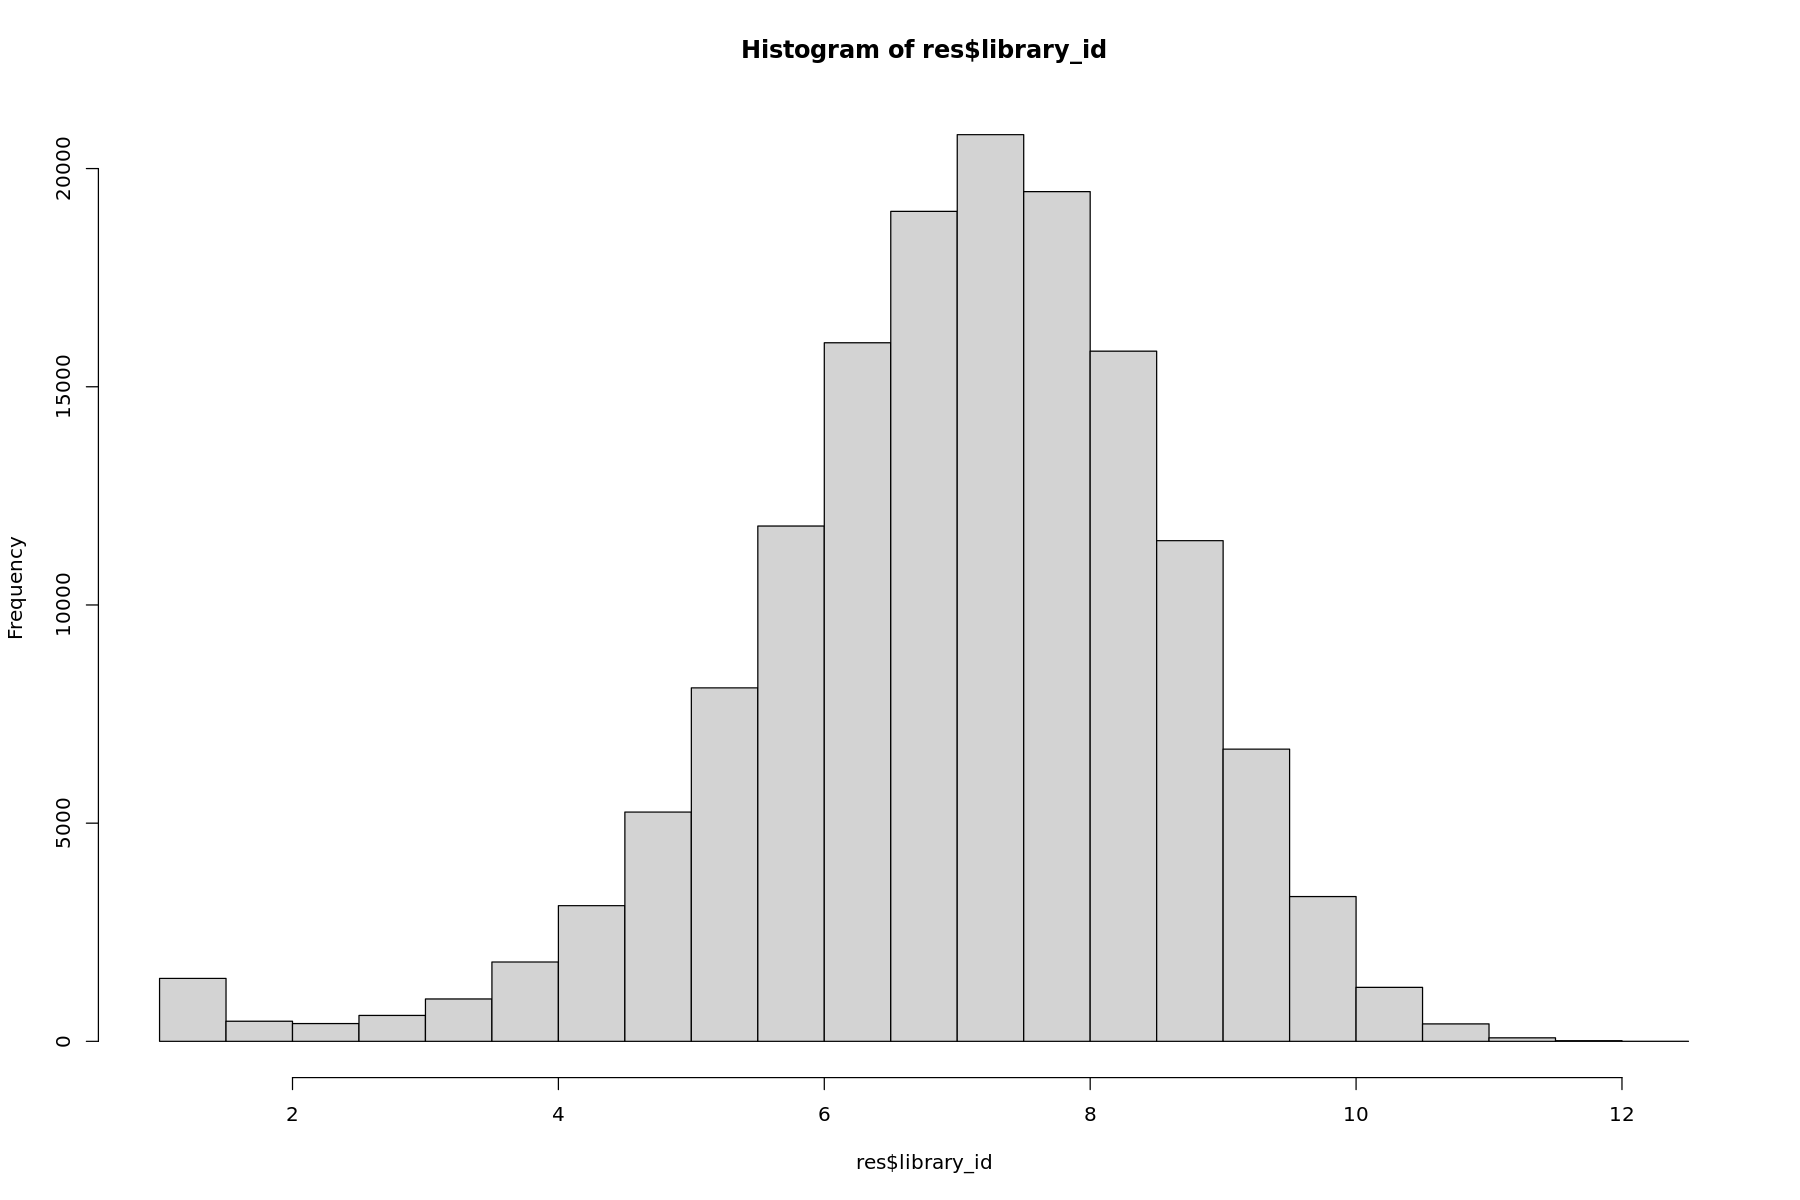

In [91]:
hist(res$library_id)

In [92]:
mean(res$library_id)

[1] 6.991528

In [93]:
### For concat embedding

In [94]:
unique(library_annotation_concat$library_id)

[1] "L1"  "L2"  "L3"  "L4"  "L5"  "L6"  "L7"  "L8"  "L9"  "L10" "L11" "L12"
[13] "L13" "L14"

In [95]:
res_concat = compute_lisi(umap_embedding_concat, library_annotation_concat, c('library_id'), perplexity = perplexity_param)

In [96]:
head(res_concat,2)

,library_id
,<dbl>
AAACCCACATACAGGG-1-L1,9.519807
AAACCCACATGACTTG-1-L1,5.534970


In [97]:
mean(res_concat$library_id)

[1] 6.825574

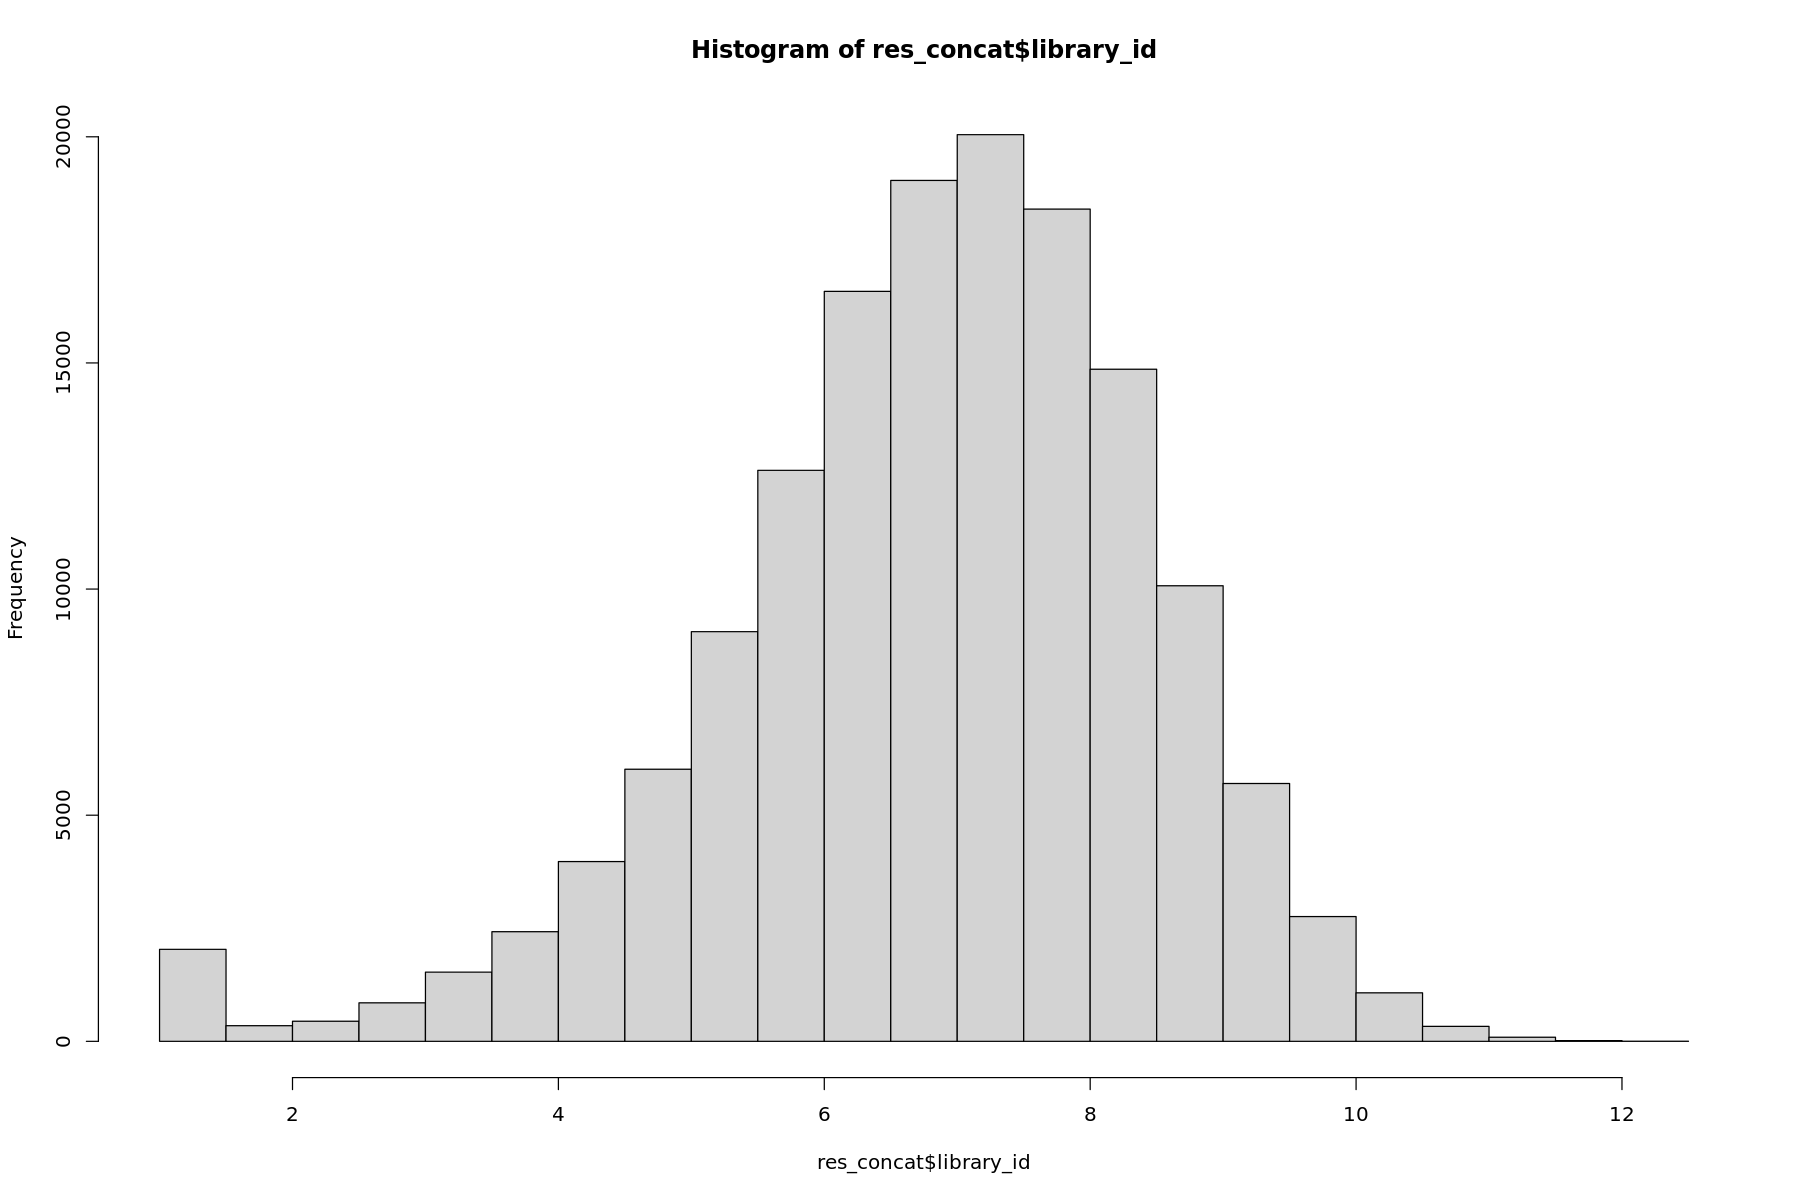

In [98]:
hist(res_concat$library_id)

In [99]:
### Combine and plot

In [100]:
res$type = 'scanorama_embedding'
res_concat$type = 'concat_embedding'

In [101]:
res_combined = rbind(res, res_concat)

In [102]:
figure_name = "SUPP9_B2_LISI_Comparison"

In [103]:
# Sizes of the plot
width_par = 5
height_par = 3

png 
  2

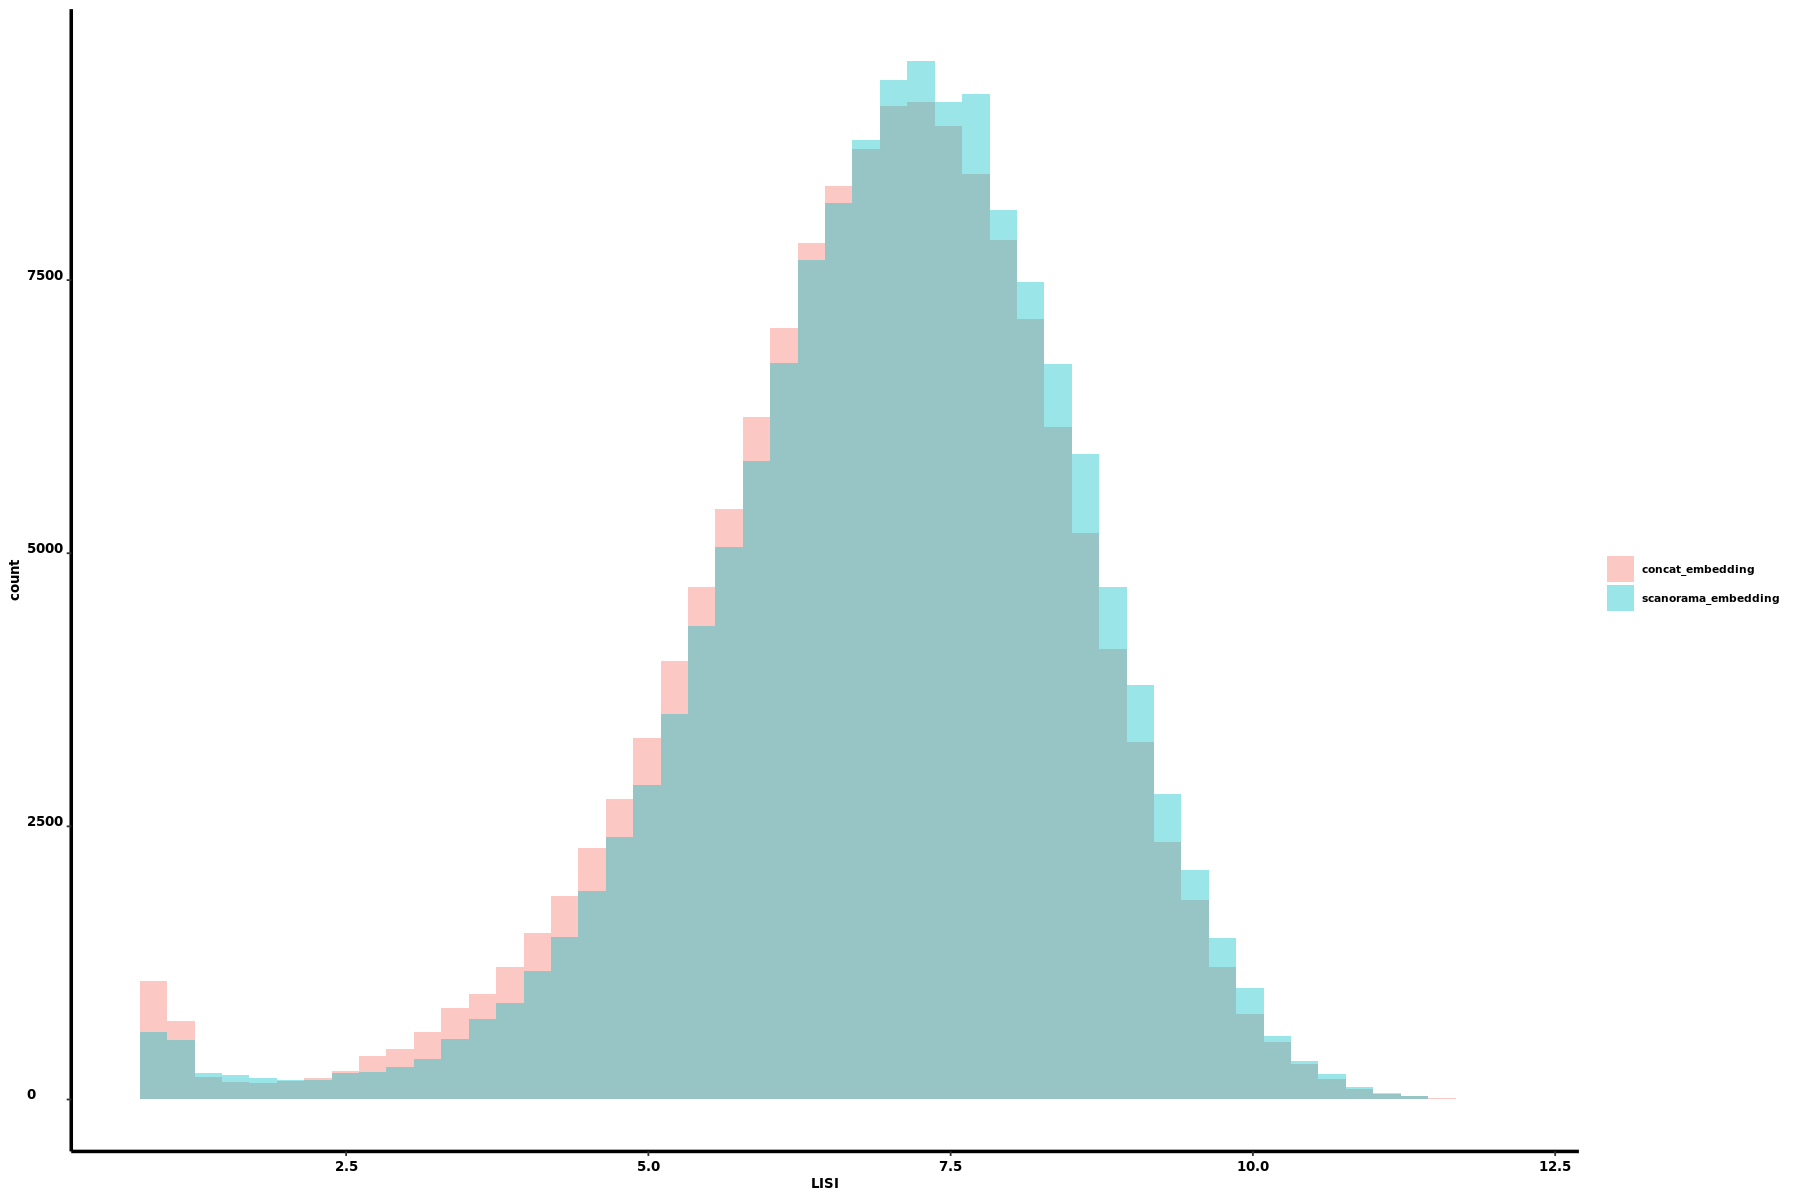

In [104]:
options(repr.plot.width=15, repr.plot.height=10)
pdf(paste0('figures/Supplementary_Figures/', figure_name,'.pdf'), width =width_par, height = height_par)
g =  ggplot(res_combined, aes(x =library_id, fill = type)) + geom_histogram(position = "identity", alpha = 0.4, bins = 50) +plot_config + xlab('LISI')
print(g)
dev.off()

g